# **Lab 1: Bisection Method**<br>

The bisection method (also known as the binary search method) is a method of finding roots of a non-linear function. The assumption here is that the function is real continuous, otherwise the bisection method will not work. It is based on the **Intermediate Value Theorem** which states that if $f(x)$ is a real continuous function, and if $f(x_l)f(x_u)< 0$ then there must be a root between $x_l$ and $x_u$.

In today's lab, we will be implementing the bisection method in python. We will be considering the function $f(x)$ as an array of coefficients, for instance if we want to have $f(x) = x^3-2x^2+4$,
<br>
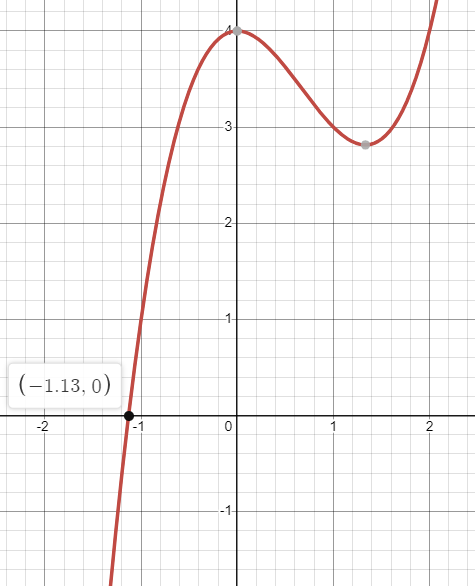
<br>
then in python we will create an array as follows:


In [ ]:
import numpy as np

f = np.array([1, -2, 0, 4])

print(f)

[ 1 -2  0  4]


Next, you will need to create a user-defined function as follows

```
bisection_method(f, xl, xu, epsilon)
```
This function will return the root of the equation represented by the array `f` and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute relative approximate error of at most $\epsilon_s$ $(\%)$, which is also called the prespecified tolerance.

In python, functions are defined as follows

In [ ]:
#Execute this cell to test how the function works

def func(a,b):
  result = a + b
  return result

print(func(1,2))

3


Note that in python, we do not need to specify the data type for parameters nor any return type for the function as these are implicitly determined. Also, note the colon (`:`) after the function signature. Indentation matters in python, since the consecutive codes having same indentation will be considered as a single block.

##Task 1
Implement the function for bisection method following the requirements set earlier. Write a script after the function to call it and test whether it is working correctly.

In [ ]:
# Complete the following function which will return the value of f(x).
def func(f, x):
  res = 0
  power = len(f) - 1
  # print(len(f))
  for i in range(len(f)):
    res = res + f[i]*pow(x,power)
    power = power - 1
  return res

In [ ]:
print(f'f(1) = {func(f, 1)}')
print(f'f(3) = {func(f, 3)}')
print(f'f(-69) = {func(f, -69)}')

f(1) = 3
f(3) = 13
f(-69) = -338027


Your output should look something like,<br>
$f(1) = 3$<br>
$f(3) = 13$<br>
$f(-69) = -338027$<br>

Now, let's work on the `bisection_method` function. Here, `xl` and `xu` are respectively your initial lower and upper guesses that must bracket the root. `epsilon` is the prespecified tolerance value $\epsilon_s$.

In [ ]:
errors = []
approximations = []
significant_digits = []

def bisection_method(f, xl, xu, epsilon, iterations):
    #write your implementation here
    if func(f, xl) * func(f, xu) >= 0:
        print("xl and xu do not cover root")
        return None

    x_root = (xl + xu) / 2.0  # first

    for i in range(iterations):
        f_mid = func(f, x_root)

        if i > 0:
            epsilon_a = abs((x_root - prev_x_root) / x_root) * 100  # Relative error in percentage
            errors.append(epsilon_a)
            m = np.floor(2 - np.log10(epsilon_a/0.5))
            significant_digits.append(m)

        if abs(f_mid) < epsilon or (xu - xl) / 2.0 < epsilon:
            return x_root

        prev_x_root = x_root

        if func(f, xl) * f_mid < 0:
            xu = x_root
        else:
            xl = x_root

        x_root = (xl + xu) / 2.0
        approximations.append(x_root)
    return x_root

In [ ]:
#Write a driver code here for calling the function and testing it
xl = -2
xu = 3
epsilon = 0.005
MAX_ITERS = 100
print(bisection_method(f, xl, xu, epsilon, MAX_ITERS))

-1.130859375


Your function should return a root value $\approx -1.13$

In [ ]:
print(errors)

[166.66666666666669, 45.45454545454545, 29.411764705882355, 12.82051282051282, 6.8493150684931505, 3.546099290780142, 1.7421602787456445, 0.8635578583765112]


## Note:
We can plot graphs in python using the `matplotlib` library. An example of plotting graphs is shown here.

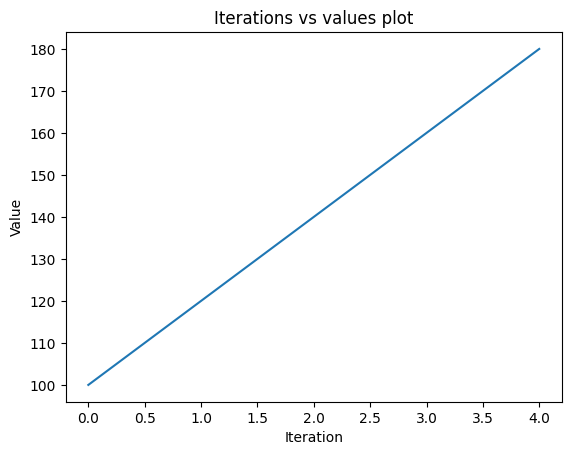

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

## Task 2
Plot a graph with Number of Iterations along the $X$-axis and Relative Approximate Error $(\epsilon_a)$ along the $Y$-axis.

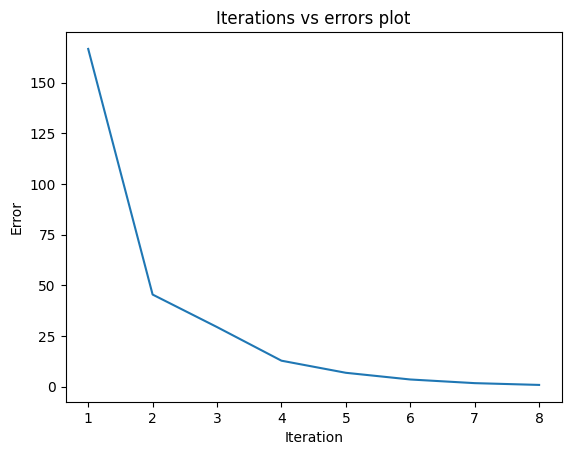

In [ ]:
iter_2 = np.arange(1, len(errors)+1)
val_2 = errors

plt.plot(iter_2, val_2)
plt.title("Iterations vs errors plot")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

Your plot should look something like this,
<br>
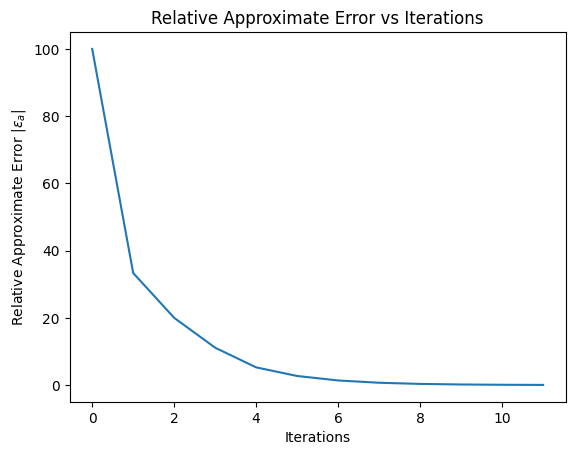

Plot a graph with Number of Iterations along the $X$-axis and Number of Significant Digits that are at least correct $(m)$ along the $Y$-axis.

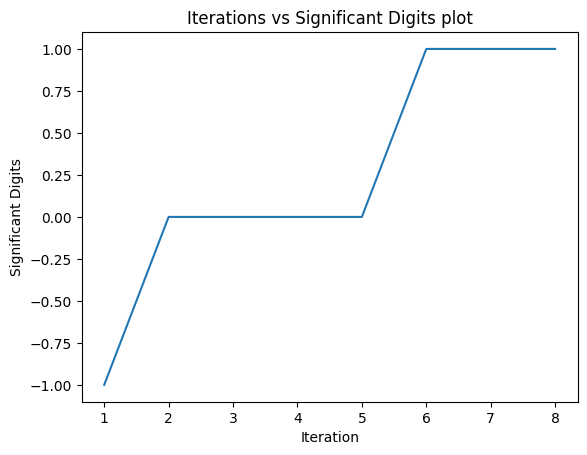

In [ ]:
iter_3 = np.arange(1, len(significant_digits)+1)
val_3 = significant_digits

plt.plot(iter_3, val_3)
plt.title("Iterations vs Significant Digits plot")
plt.xlabel("Iteration")
plt.ylabel("Significant Digits")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Root Approximation $(x_m)$ along the $Y$-axis.

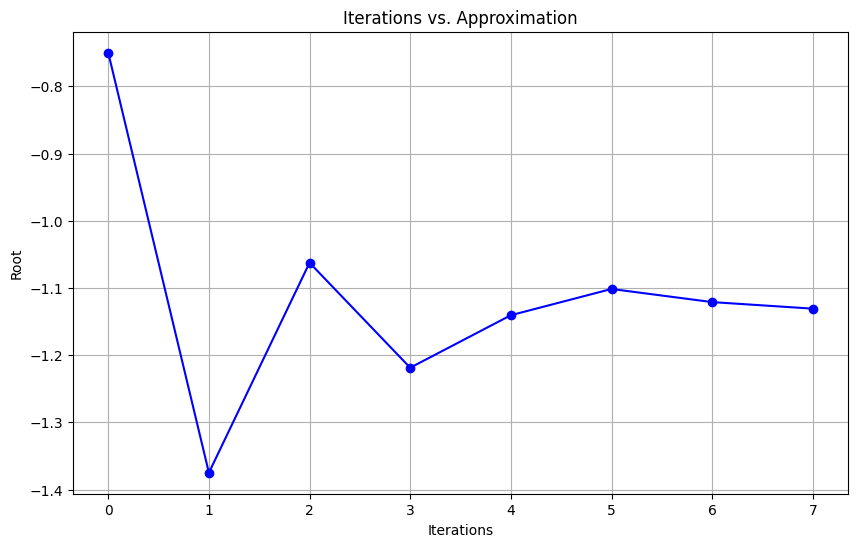

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(approximations)), approximations, marker='o', linestyle='-', color='b')
plt.xlabel('Iterations')
plt.ylabel('Root')
plt.title('Iterations vs. Approximation')
plt.grid(True)
plt.show()